<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [3]:

# Your code here


### 1.2 NumPy’s PRNG

In [4]:
np.random.rand()   # give one number

0.3080086130263249

In [5]:
np.random.rand(10)          

array([0.16614025, 0.32520437, 0.70549697, 0.79604155, 0.2072747 ,
       0.23720538, 0.67470143, 0.36112618, 0.41795169, 0.29134142])

In [6]:
np.random.rand(5,2)   # give five sets of 2

array([[0.78286521, 0.8709342 ],
       [0.15501181, 0.07639781],
       [0.28175605, 0.50060956],
       [0.49717287, 0.34380764],
       [0.01052792, 0.77314314]])

In [7]:
n = 10000
random_numbers = np.random.rand(n)

print(np.sum(random_numbers < .5) / n * 100)

print(np.sum(random_numbers < .25) / n * 100)

print(np.sum(random_numbers > .75) / n * 100)

50.029999999999994
24.6
25.21


### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

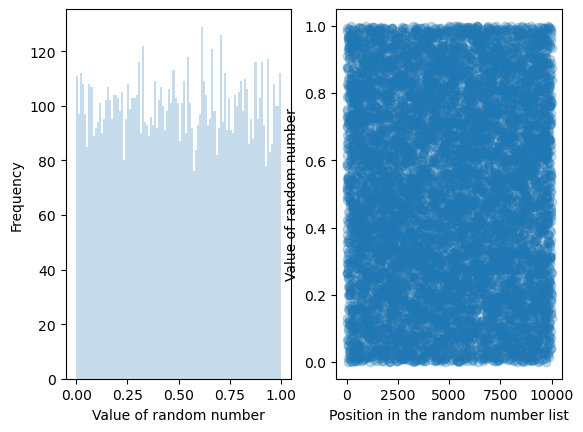

In [8]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

In [9]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

### 1.5 ‘seeding’ a PRNG

In [10]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([44, 22, 39, 98, 69, 23, 26, 72,  1, 79])

In [11]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([22, 46, 48, 66, 44, 60, 22, 92, 90, 28])

In [12]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [13]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [14]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options) #picks one of the options randomly

In [15]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [16]:
np.random.choice(['Head', 'Tails'])

'Head'

In [17]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [18]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [19]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.60%


### 3.2 A biased coin

In [20]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.70%


### 3.3 A flipping experiment

In [21]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

In [22]:
heads_probability = heads_counts/no_of_repeats

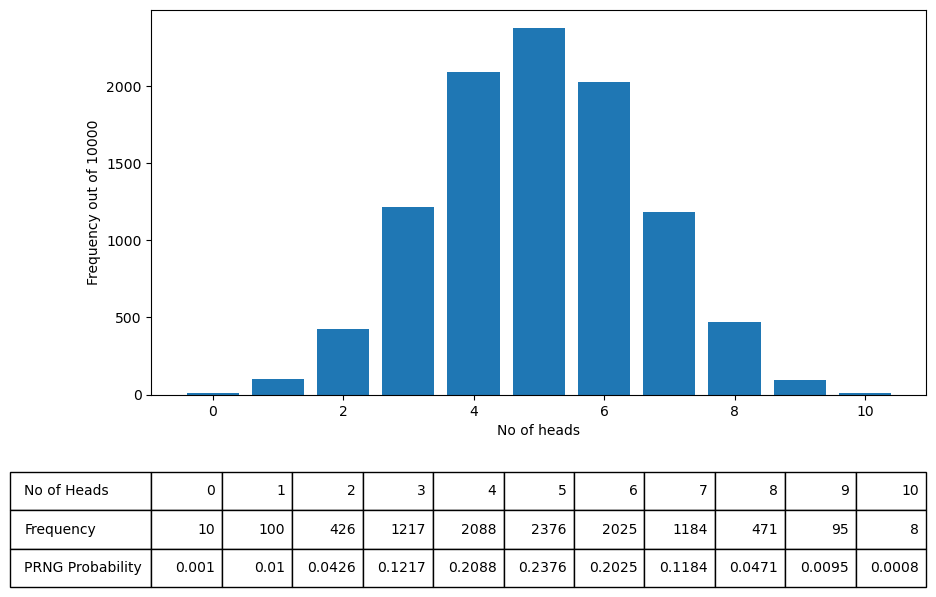

In [23]:
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])
plt.show()

In [24]:
from scipy.stats import binom

In [28]:
binom.pmf(k=7, n=10, p=.5)

0.11718749999999999

In [29]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

## Exercise 1 :  12C, 13C

In [25]:
def flip_carbon(no_of_carbons=1, probability=.9889):
    results = np.random.rand(no_of_carbons)
    no_of_C13 = np.sum(results > probability)
    return no_of_C13

no_of_repeats = 10_000
result = [flip_carbon(no_of_carbons=27) for _ in range(no_of_repeats)]
no_of_C13, C13_counts = np.unique(result, return_counts=True)

In [26]:
mean = np.mean(result)
print(mean)

std_dev = np.std(result)
print(std_dev)

0.2919
0.5330050562611953


In [27]:
zero = result.count(0)
prob = zero/no_of_repeats
print(prob)

0.7442
